<a href="https://colab.research.google.com/github/Hannanote/Marketing-Campaign-Project/blob/main/Group7_Heart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
import plotly.express as px
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.svm import SVC
from sklearn import metrics

## Data Features

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


Age: age of the patient [years]

Sex: sex of the patient [M: Male, F: Female]

ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]

RestingBP: resting blood pressure [mm Hg]

Cholesterol: serum cholesterol [mm/dl]

FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]

RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]

MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]

ExerciseAngina: exercise-induced angina [Y: Yes, N: No]

Oldpeak: oldpeak = ST [Numeric value measured in depression]

ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]

HeartDisease: output class [1: heart disease, 0: Normal]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [ ]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


## EDA

<ipython-input-7-925f89687905>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


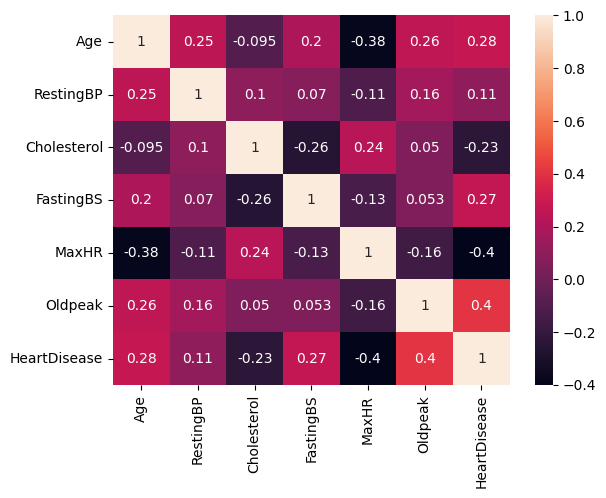

In [ ]:
corr = df.corr()
sns.heatmap(corr, annot=True)
plt.show()

In [ ]:
df.corr()

<ipython-input-61-2f6f6606aa2c>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


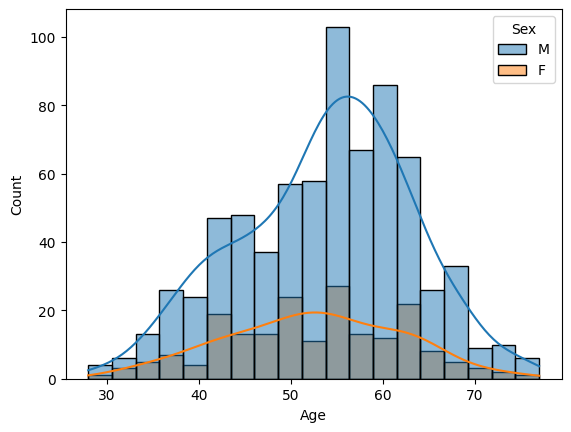

In [ ]:
sns.histplot(df, x='Age',hue= 'Sex', kde=True)
plt.show()

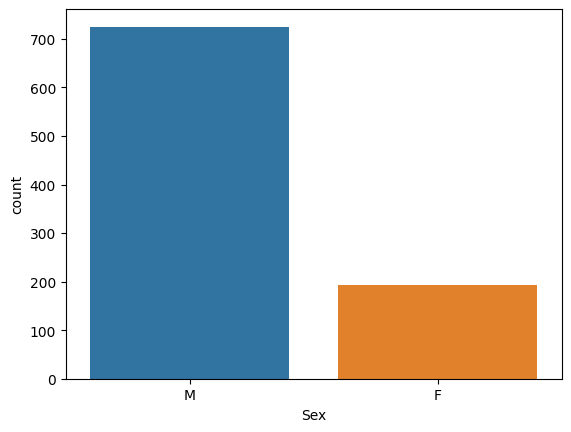

In [ ]:
sns.countplot(df, x='Sex')
plt.show()

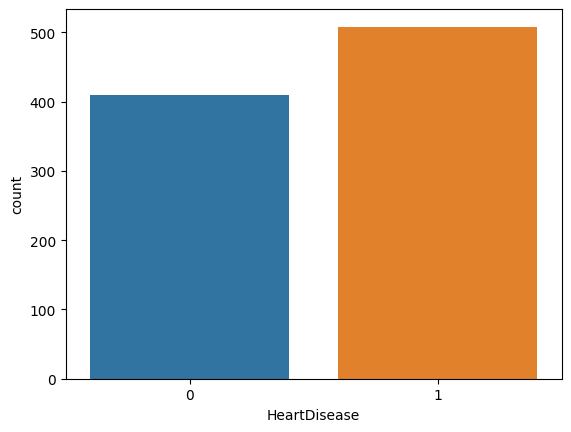

In [ ]:
sns.countplot(df, x='HeartDisease')
plt.show()

In [ ]:
px.histogram(df, x='HeartDisease', color='Sex', barmode='group')

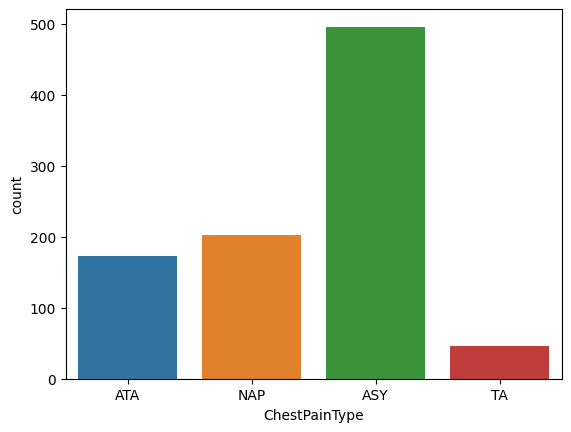

In [ ]:
sns.countplot(df, x='ChestPainType')
plt.show()

In [ ]:
px.histogram(df, x='ChestPainType', color='Sex', barmode='group')

In [ ]:
px.histogram(df, x='ChestPainType', color='HeartDisease', barmode='group')

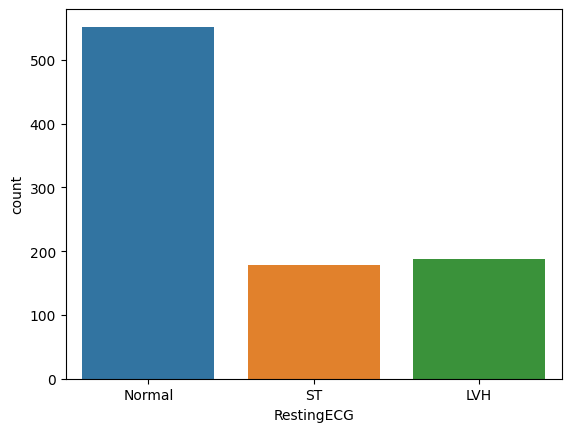

In [ ]:
sns.countplot(df, x='RestingECG')
plt.show()

In [ ]:
px.histogram(df, x='RestingECG', color='Sex', barmode='group')

In [ ]:
px.histogram(df, x='RestingECG', color='HeartDisease', barmode='group')

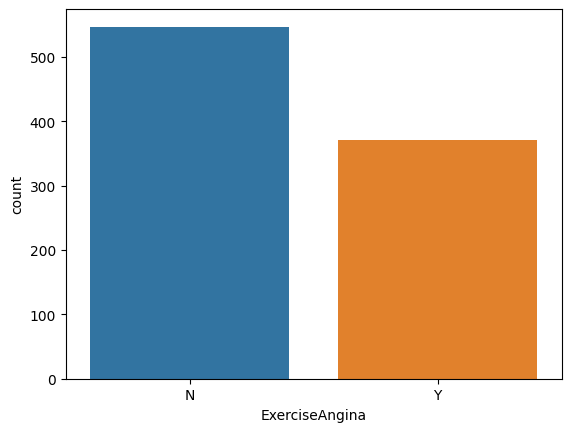

In [ ]:
sns.countplot(df, x='ExerciseAngina')
plt.show()

In [ ]:
px.histogram(df, x='ExerciseAngina', color='Sex', barmode='group')

In [ ]:
px.histogram(df, x='ExerciseAngina', color='HeartDisease', barmode='group')

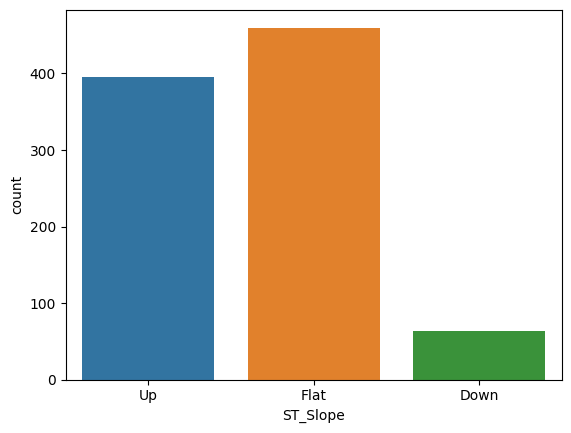

In [ ]:
sns.countplot(df, x='ST_Slope')
plt.show()

In [ ]:
px.histogram(df, x='ST_Slope', color='Sex', barmode='group')

In [ ]:
px.histogram(df, x='ST_Slope', color='HeartDisease', barmode='group')

array([<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
      dtype=object)

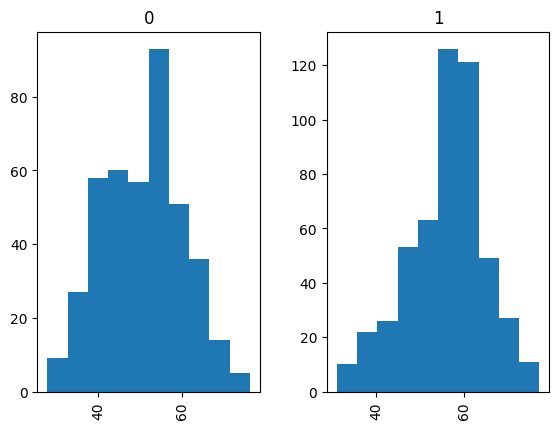

In [ ]:
df['Age'].hist(by=df['HeartDisease'])

In [ ]:
X = df.drop(['HeartDisease'], axis=1)
X.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up


In [ ]:
y = df.HeartDisease
y.head()

0    0
1    1
2    0
3    1
4    0
Name: HeartDisease, dtype: int64

In [ ]:
X = X.drop(['RestingBP', 'RestingECG'], axis=1)
X.head()

,Age,Sex,ChestPainType,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,M,ATA,289,0,172,N,0.0,Up
1,49,F,NAP,180,0,156,N,1.0,Flat
2,37,M,ATA,283,0,98,N,0.0,Up
3,48,F,ASY,214,0,108,Y,1.5,Flat
4,54,M,NAP,195,0,122,N,0.0,Up


In [ ]:
X = pd.get_dummies(X,['Sex', 'ChestingType', 'ExerciseAngina', 'ST_Slope'])
X.head()

,Age,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestingType_ASY,ChestingType_ATA,ChestingType_NAP,ChestingType_TA,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,289,0,172,0.0,0,1,0,1,0,0,1,0,0,0,1
1,49,180,0,156,1.0,1,0,0,0,1,0,1,0,0,1,0
2,37,283,0,98,0.0,0,1,0,1,0,0,1,0,0,0,1
3,48,214,0,108,1.5,1,0,1,0,0,0,0,1,0,1,0
4,54,195,0,122,0.0,0,1,0,0,1,0,1,0,0,0,1


<ipython-input-51-5ca656fef20f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr1= X.corr()


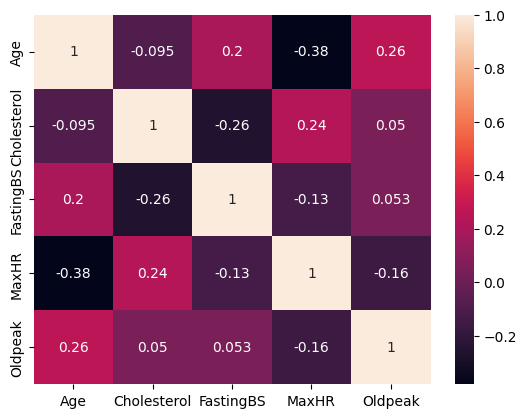

In [ ]:
corr1= X.corr()
sns.heatmap(corr1, annot=True)
plt.show()

## Preparing the Train, Test, & Validation Data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state = 51)
print("Length of training set:" +str(len(X_train)))

Length of training set:734


In [ ]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
std_scaler.fit(X)
X_train_std=std_scaler.transform(X_train)
X_test_std=std_scaler.transform(X_test)

X_train = pd.DataFrame(X_train_std, columns=X.columns)
X_test = pd.DataFrame(X_test_std, columns=X.columns)

In [ ]:
display(X_train.head())
display(X_test.head())

,Age,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestingType_ASY,ChestingType_ATA,ChestingType_NAP,ChestingType_TA,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,0.157954,-0.354903,-0.551341,0.518368,-0.832432,-0.515952,0.515952,0.922392,-0.481887,-0.532838,-0.229679,0.823556,-0.823556,-0.271448,-1.002181,1.150674
1,-0.054192,0.687864,-0.551341,-0.267596,-0.832432,1.938163,-1.938163,-1.084138,-0.481887,1.876744,-0.229679,0.823556,-0.823556,-0.271448,-1.002181,1.150674
2,-0.266338,0.907394,-0.551341,-0.581981,3.107570,-0.515952,0.515952,0.922392,-0.481887,-0.532838,-0.229679,-1.214246,1.214246,-0.271448,0.997824,-0.869056
3,-2.493869,0.349422,-0.551341,1.304332,-0.832432,1.938163,-1.938163,-1.084138,-0.481887,-0.532838,4.353909,0.823556,-0.823556,-0.271448,-1.002181,1.150674
4,0.264027,-1.818435,1.813758,-2.153909,-1.770528,-0.515952,0.515952,0.922392,-0.481887,-0.532838,-0.229679,0.823556,-0.823556,-0.271448,-1.002181,1.150674


,Age,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestingType_ASY,ChestingType_ATA,ChestingType_NAP,ChestingType_TA,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,-1.327067,-0.245138,-0.551341,-0.267596,1.043759,-0.515952,0.515952,0.922392,-0.481887,-0.532838,-0.229679,0.823556,-0.823556,-0.271448,0.997824,-0.869056
1,0.157954,-1.818435,-0.551341,-2.114611,-0.832432,-0.515952,0.515952,0.922392,-0.481887,-0.532838,-0.229679,0.823556,-0.823556,-0.271448,0.997824,-0.869056
2,0.688318,0.065863,-0.551341,-0.188999,1.418998,-0.515952,0.515952,0.922392,-0.481887,-0.532838,-0.229679,-1.214246,1.214246,-0.271448,0.997824,-0.869056
3,-0.796702,0.669570,1.813758,1.500823,1.043759,-0.515952,0.515952,-1.084138,-0.481887,-0.532838,4.353909,0.823556,-0.823556,-0.271448,0.997824,-0.869056
4,0.370100,0.514070,-0.551341,-1.760927,1.981855,-0.515952,0.515952,0.922392,-0.481887,-0.532838,-0.229679,-1.214246,1.214246,-0.271448,0.997824,-0.869056


In [ ]:
df_model_summary_cat = pd.DataFrame(
   {
      "Model": [],
      "Recall": [],
      "Specificity": [],
      "Precision": [],
      "Balanced Accuracy": [],
      "F1-Score": []
   }
)


def add_score_cat(model, recall, specificity, precision, balanced_accuracy, f1_score):
   df_model_summary_cat.loc[df_model_summary_cat.shape[0]] = [model, recall, specificity, precision, balanced_accuracy,
                                                              f1_score]

## Logistic Regression Classifier

In [ ]:
clf = LogisticRegression(random_state=51, C=10)
clf.fit(X_train, y_train)
y_train_pred = clf.predict(X_train)

# code to calculate accuracy scores and confusion matrices
print("Training Set:\n")
print(classification_report(y_train, y_train_pred))
print(confusion_matrix(y_train, y_train_pred))

matrix = confusion_matrix(y_train, y_train_pred)
print(matrix)
TN = matrix[0, 0]
FP = matrix[0, 1]
FN = matrix[1, 0]
TP = matrix[1, 1]
accuracy = accuracy_score(y_train, y_train_pred)
specificity = (TN / (TN + FP))
recall = recall_score(y_train, y_train_pred)
precision = precision_score(y_train, y_train_pred)
f1 = f1_score(y_train, y_train_pred)
print('Accuracy: %.2f' % accuracy)
print('Specificity: %.2f' % specificity)
print('Recall: %.2f' % recall)
print('Precision: %.2f' % precision)
print('F1-Score: %.2f' % f1)

add_score_cat("LogisticRegression", recall, specificity, precision, accuracy, f1)

Training Set:

              precision    recall  f1-score   support

           0       0.87      0.86      0.86       335
           1       0.88      0.89      0.89       399

    accuracy                           0.88       734
   macro avg       0.88      0.87      0.87       734
weighted avg       0.88      0.88      0.88       734

[[287  48]
 [ 43 356]]
[[287  48]
 [ 43 356]]
Accuracy: 0.88
Specificity: 0.86
Recall: 0.89
Precision: 0.88
F1-Score: 0.89


## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clfd = DecisionTreeClassifier(max_depth=10, random_state=51)
clfd.fit(X_train, y_train)
y_train_pred = clf.predict(X_train)

# code to calculate accuracy scores and confusion matrices
print("Training Set:\n")
print(classification_report(y_train, y_train_pred))
print(confusion_matrix(y_train, y_train_pred))

matrix = confusion_matrix(y_train, y_train_pred)
print(matrix)
TN = matrix[0, 0]
FP = matrix[0, 1]
FN = matrix[1, 0]
TP = matrix[1, 1]
accuracy = accuracy_score(y_train, y_train_pred)
specificity = (TN / (TN + FP))
recall = recall_score(y_train, y_train_pred)
precision = precision_score(y_train, y_train_pred)
f1 = f1_score(y_train, y_train_pred)
print('Accuracy: %.3f' % accuracy)
print('Specificity: %.3f' % specificity)
print('Recall: %.3f' % recall)
print('Precision: %.3f' % precision)
print('F1-Score: %.3f' % f1)

add_score_cat("DecisionTree", recall, specificity, precision, accuracy, f1)

Training Set:

              precision    recall  f1-score   support

           0       0.87      0.86      0.86       335
           1       0.88      0.89      0.89       399

    accuracy                           0.88       734
   macro avg       0.88      0.87      0.87       734
weighted avg       0.88      0.88      0.88       734

[[287  48]
 [ 43 356]]
[[287  48]
 [ 43 356]]
Accuracy: 0.876
Specificity: 0.857
Recall: 0.892
Precision: 0.881
F1-Score: 0.887


## Random Forest Classifier

In [ ]:
clf_gb = RandomForestClassifier(max_depth=10, n_estimators=10, random_state=51)
clf_gb.fit(X_train, y_train)
y_train_pred = clf_gb.predict(X_train)

print("Training Set:\n")
print(classification_report(y_train, y_train_pred))
print(confusion_matrix(y_train, y_train_pred))

matrix = confusion_matrix(y_train, y_train_pred)
print(matrix)
TN = matrix[0, 0]
FP = matrix[0, 1]
FN = matrix[1, 0]
TP = matrix[1, 1]
accuracy = accuracy_score(y_train, y_train_pred)
specificity = (TN / (TN + FP))
recall = recall_score(y_train, y_train_pred)
precision = precision_score(y_train, y_train_pred)
f1 = f1_score(y_train, y_train_pred)
print('Accuracy: %.3f' % accuracy)
print('Specificity: %.3f' % specificity)
print('Recall: %.3f' % recall)
print('Precision: %.3f' % precision)
print('F1-Score: %.3f' % f1)

add_score_cat("RandomForestClassifier", recall, specificity, precision, accuracy, f1)

Training Set:

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       335
           1       0.98      0.97      0.97       399

    accuracy                           0.97       734
   macro avg       0.97      0.97      0.97       734
weighted avg       0.97      0.97      0.97       734

[[327   8]
 [ 12 387]]
[[327   8]
 [ 12 387]]
Accuracy: 0.973
Specificity: 0.976
Recall: 0.970
Precision: 0.980
F1-Score: 0.975


## K-Nearest Neighbors

In [ ]:
clf = KNeighborsClassifier(n_neighbors=4, p=1, weights='uniform')
clf.fit(X_train, y_train)
y_train_pred = clf.predict(X_train)

print("Training Set:\n")
print(classification_report(y_train, y_train_pred))
print(confusion_matrix(y_train, y_train_pred))

matrix = confusion_matrix(y_train, y_train_pred)
print(matrix)
TN = matrix[0, 0]
FP = matrix[0, 1]
FN = matrix[1, 0]
TP = matrix[1, 1]
accuracy = accuracy_score(y_train, y_train_pred)
specificity = (TN / (TN + FP))
recall = recall_score(y_train, y_train_pred)
precision = precision_score(y_train, y_train_pred)
f1 = f1_score(y_train, y_train_pred)
print('Accuracy: %.3f' % accuracy)
print('Specificity: %.3f' % specificity)
print('Recall: %.3f' % recall)
print('Precision: %.3f' % precision)
print('F1-Score: %.3f' % f1)

add_score_cat("KNeighborsClassifier", recall, specificity, precision, accuracy, f1)

Training Set:

              precision    recall  f1-score   support

           0       0.85      0.93      0.89       335
           1       0.93      0.86      0.90       399

    accuracy                           0.89       734
   macro avg       0.89      0.90      0.89       734
weighted avg       0.90      0.89      0.89       734

[[311  24]
 [ 55 344]]
[[311  24]
 [ 55 344]]
Accuracy: 0.892
Specificity: 0.928
Recall: 0.862
Precision: 0.935
F1-Score: 0.897


## Support Vector Classifier

In [ ]:
from sklearn.svm import SVC
clf_sv = SVC(kernel = 'linear', C=0.1)
clf_sv.fit(X_train, y_train)
y_train_pred = clf_sv.predict(X_train)

print("Training Set:\n")
print(classification_report(y_train, y_train_pred))
print(confusion_matrix(y_train, y_train_pred))

matrix = confusion_matrix(y_train, y_train_pred)
print(matrix)
TN = matrix[0, 0]
FP = matrix[0, 1]
FN = matrix[1, 0]
TP = matrix[1, 1]
accuracy = accuracy_score(y_train, y_train_pred)
specificity = (TN / (TN + FP))
recall = recall_score(y_train, y_train_pred)
precision = precision_score(y_train, y_train_pred)
f1 = f1_score(y_train, y_train_pred)
print('Accuracy: %.3f' % accuracy)
print('Specificity: %.3f' % specificity)
print('Recall: %.3f' % recall)
print('Precision: %.3f' % precision)
print('F1-Score: %.3f' % f1)

add_score_cat("SupportVectorClassifier", recall, specificity, precision, accuracy, f1)

Training Set:

              precision    recall  f1-score   support

           0       0.87      0.84      0.86       335
           1       0.87      0.89      0.88       399

    accuracy                           0.87       734
   macro avg       0.87      0.87      0.87       734
weighted avg       0.87      0.87      0.87       734

[[283  52]
 [ 43 356]]
[[283  52]
 [ 43 356]]
Accuracy: 0.871
Specificity: 0.845
Recall: 0.892
Precision: 0.873
F1-Score: 0.882


In [ ]:
df_model_summary_cat

,Model,Recall,Specificity,Precision,Balanced Accuracy,F1-Score
0,LogisticRegression,0.892231,0.856716,0.881188,0.876022,0.886675
1,DecisionTree,0.892231,0.856716,0.881188,0.876022,0.886675
2,RandomForestClassifier,0.969925,0.976119,0.979747,0.972752,0.974811
3,KNeighborsClassifier,0.862155,0.928358,0.934783,0.892371,0.897001
4,SupportVectorClassifier,0.892231,0.844776,0.872549,0.870572,0.882280


In [ ]:
clf_gb = RandomForestClassifier(max_depth=10, n_estimators=10, random_state=51)
clf_gb.fit(X_train, y_train)
y_test_pred = clf_gb.predict(X_test)

print("\nTest Set:\n")
print(classification_report(y_test, y_test_pred))
matrix = confusion_matrix(y_test, y_test_pred)
print(matrix)
TN = matrix[0, 0]
FP = matrix[0, 1]
FN = matrix[1, 0]
TP = matrix[1, 1]
accuracy = accuracy_score(y_test, y_test_pred)
specificity = (TN / (TN + FP))
recall = recall_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
print('Accuracy: %.3f' % accuracy)
print('Specificity: %.3f' % specificity)
print('Recall: %.3f' % recall)
print('Precision: %.3f' % precision)
print('F1-Score: %.3f' % f1)


Test Set:

              precision    recall  f1-score   support

           0       0.83      0.77      0.80        75
           1       0.85      0.89      0.87       109

    accuracy                           0.84       184
   macro avg       0.84      0.83      0.83       184
weighted avg       0.84      0.84      0.84       184

[[58 17]
 [12 97]]
Accuracy: 0.842
Specificity: 0.773
Recall: 0.890
Precision: 0.851
F1-Score: 0.870


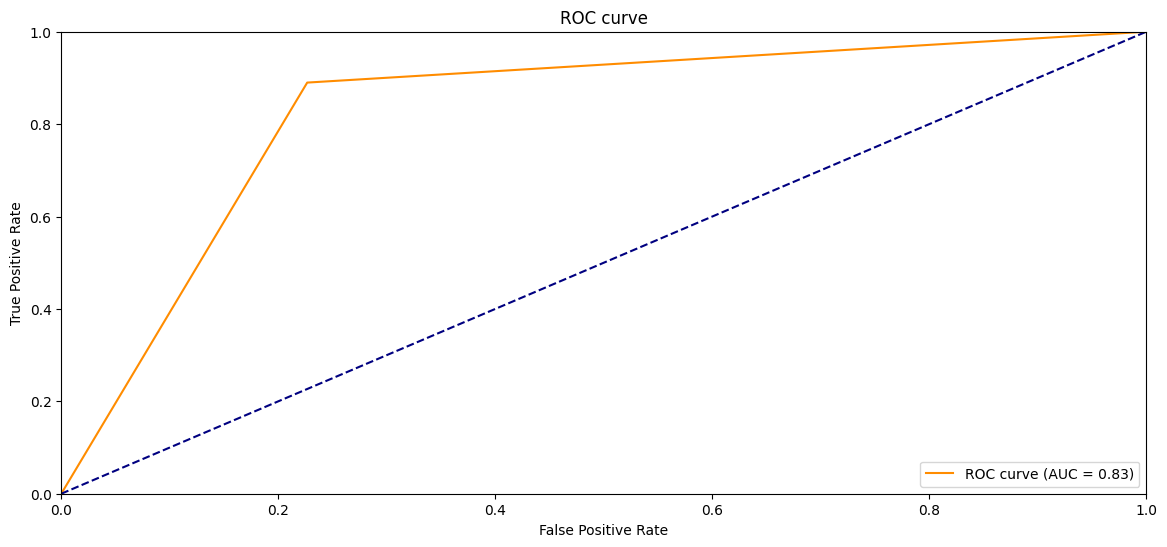

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

fpr, tpr, thresholds =roc_curve(y_test, y_test_pred, pos_label=1)
roc_auc=roc_auc_score(y_test, y_test_pred)
plt.figure( figsize=(14,6))
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy',linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()